In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/chrisalbon/simulated_datasets/master/data.json'
json = pd.read_json(url)

In [2]:
json.tail(6)

,integer,datetime,category
94,5,2015-01-01 00:01:34,0
95,9,2015-01-01 00:01:35,0
96,8,2015-01-01 00:01:36,0
97,6,2015-01-01 00:01:37,0
98,8,2015-01-01 00:01:38,0
99,1,2015-01-01 00:01:39,0


In [3]:
json.shape

(100, 3)

In [4]:
json.to_json('dataframe.json')

In [9]:
nested_json = """{
    "article": [
        {
            "id": "01",
            "language": "JSON",
            "edition": "first",
            "author": "Allen"
        },
        {
            "id": "02",
            "language": "Python",
            "edition": "second",
            "author": "Aditya Sharma"
        }
    ],
    
    "blog": [
        {
            "name": "Datacamp",
            "URL": "datacamp.com"
        }
    ]
}"""

In [10]:
import json
from pandas.io.json import json_normalize

nested = json.loads(nested_json)

In [11]:
nested

{'article': [{'id': '01',
   'language': 'JSON',
   'edition': 'first',
   'author': 'Allen'},
  {'id': '02',
   'language': 'Python',
   'edition': 'second',
   'author': 'Aditya Sharma'}],
 'blog': [{'name': 'Datacamp', 'URL': 'datacamp.com'}]}

In [12]:
nested_full = json_normalize(nested)
nested_full

,article,blog
0,"[{'id': '01', 'language': 'JSON', 'edition': '...","[{'name': 'Datacamp', 'URL': 'datacamp.com'}]"


In [13]:
blog = json_normalize(nested, record_path='blog')
blog

,URL,name
0,datacamp.com,Datacamp


In [14]:
article = json_normalize(nested, record_path='article')
article

,author,edition,id,language
0,Allen,first,01,JSON
1,Aditya Sharma,second,02,Python


In [15]:
nested_json = {
    "article": [
        {
            "id": "01",
            "language": "JSON",
            "edition": "first",
            "author": "Allen"
        },
        {
            "id": "02",
            "language": "Python",
            "edition": "second",
            "author": "Aditya Sharma"
        }
    ],
    
    "blog": [
        {
            "name": "Datacamp",
            "URL": "datacamp.com"
        }
    ]
}

In [16]:
json_file = pd.DataFrame.from_dict(json_normalize(nested_json))
json_file

,article,blog
0,"[{'id': '01', 'language': 'JSON', 'edition': '...","[{'name': 'Datacamp', 'URL': 'datacamp.com'}]"


In [17]:
import requests
url = 'https://www.worldcoinindex.com/'
crypto_url = requests.get(url)
crypto_url

<Response [200]>

In [18]:
crypto_data = pd.read_html(crypto_url.text)
print(len(crypto_data))
print(type(crypto_data))

1
<class 'list'>


In [19]:
crypto_data = crypto_data[0]

In [20]:
crypto_final = crypto_data.iloc[:, 2:]
crypto_final.head()

,Name,Ticker,Last price,%,24 high,24 low,Price Charts 7d,24 volume,# Coins,Market cap
0,bitcoin,BTC,"$ 7,669.233",-5.72%,"$ 8,134.500","$ 7,610.561",NaN,$ 11.93B,17.74M,$ 136.05B
1,ethereum,ETH,$ 241.53963,-3.71%,$ 250.85644,$ 238.82313,NaN,$ 6.37B,106.35M,$ 25.68B
2,eos,EOS,$ 6.3749150,-5.15%,$ 6.8562049,$ 6.2783332,NaN,$ 3.45B,1.01B,$ 6.46B
3,litecoin,LTC,$ 102.05268,-4.15%,$ 106.46630,$ 100.93849,NaN,$ 3.22B,62.07M,$ 6.33B
4,ripple,XRP,$ 0.39611588,-5.50%,$ 0.41917076,$ 0.38970806,NaN,$ 2.15B,42.18B,$ 16.70B


In [21]:
del crypto_final['Price Charts 7d']
crypto_final.head()

,Name,Ticker,Last price,%,24 high,24 low,24 volume,# Coins,Market cap
0,bitcoin,BTC,"$ 7,669.233",-5.72%,"$ 8,134.500","$ 7,610.561",$ 11.93B,17.74M,$ 136.05B
1,ethereum,ETH,$ 241.53963,-3.71%,$ 250.85644,$ 238.82313,$ 6.37B,106.35M,$ 25.68B
2,eos,EOS,$ 6.3749150,-5.15%,$ 6.8562049,$ 6.2783332,$ 3.45B,1.01B,$ 6.46B
3,litecoin,LTC,$ 102.05268,-4.15%,$ 106.46630,$ 100.93849,$ 3.22B,62.07M,$ 6.33B
4,ripple,XRP,$ 0.39611588,-5.50%,$ 0.41917076,$ 0.38970806,$ 2.15B,42.18B,$ 16.70B


In [22]:
crypto_final = crypto_final.dropna()

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
crypto_final['%'] = crypto_final['%'].apply(lambda x: x.strip('%'))
crypto_final['%'] = crypto_final['%'].astype('float')

<Figure size 432x288 with 0 Axes>

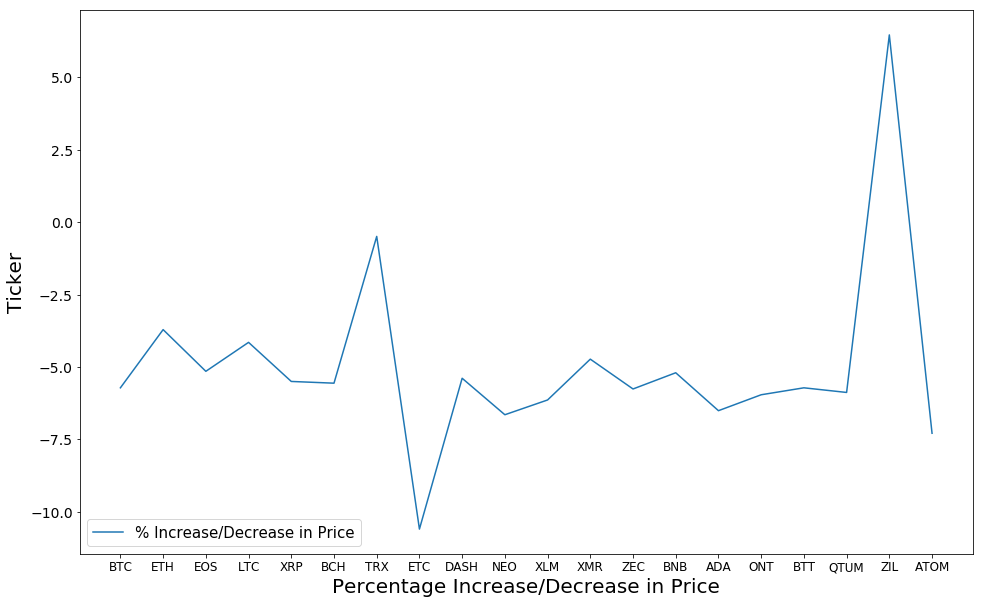

In [25]:
plt.figure()
plt.figure(figsize=(16,10))
x = crypto_final.iloc[:20]['Ticker']
y = crypto_final.iloc[:20]['%']
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Percentage Increase/Decrease in Price', fontsize=20)
plt.ylabel('Ticker', fontsize=20)

plt.plot(x, y, label='% Increase/Decrease in Price')
plt.legend(loc='lower left', prop={'size': 15})

In [26]:
import pickle
with open('crypto_final.pickle', 'wb') as sub_data:
    pickle.dump(crypto_final, sub_data, protocol=pickle.HIGHEST_PROTOCOL)

In [27]:
crypto = pd.read_pickle('crypto_final.pickle')
crypto.head()

,Name,Ticker,Last price,%,24 high,24 low,24 volume,# Coins,Market cap
0,bitcoin,BTC,"$ 7,669.233",-5.72,"$ 8,134.500","$ 7,610.561",$ 11.93B,17.74M,$ 136.05B
1,ethereum,ETH,$ 241.53963,-3.71,$ 250.85644,$ 238.82313,$ 6.37B,106.35M,$ 25.68B
2,eos,EOS,$ 6.3749150,-5.15,$ 6.8562049,$ 6.2783332,$ 3.45B,1.01B,$ 6.46B
3,litecoin,LTC,$ 102.05268,-4.15,$ 106.46630,$ 100.93849,$ 3.22B,62.07M,$ 6.33B
4,ripple,XRP,$ 0.39611588,-5.50,$ 0.41917076,$ 0.38970806,$ 2.15B,42.18B,$ 16.70B
